In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
import nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from collections import Counter

In [8]:
papers = pd.read_csv("tabela_1_ed_sem_2019.csv", index_col=[0])

In [11]:
papers.head(5)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."


In [25]:
abstracts_full = papers[["Abstract", "Year"]]


In [15]:
stop = stopwords.words('english')


In [26]:
def freq_words_by_year(year):
    abstracts_year = abstracts_full[abstracts_full["Year"] == year]["Abstract"]
    abstracts_year_cat = abstracts_year.str.cat(sep=" ")
    
    punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
    transtab = str.maketrans(dict.fromkeys(punct, ''))
    abstracts_year_no_punct = abstracts_year_cat.translate(transtab)
    
    stop_words = stopwords.words('english')
    word_tokens_year = word_tokenize(abstracts_year_no_punct.lower()) 
    
    filtered_sentence_year = [] 
    for w in word_tokens_year: 
        if w not in stop_words: 
            filtered_sentence_year.append(w)
    
    #retirar a lematization, 16S é removido
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_year = []
    
    
    for w in filtered_sentence_year:
        lemmatized_w = wordnet_lemmatizer.lemmatize(w)
        lemmatized_year.append(lemmatized_w)
    '''
        
    freq_dict = Counter(filtered_sentence_year)

    freq_df = pd.DataFrame.from_dict(freq_dict, orient='index').reset_index()
    freq_df.columns = ["word", "freq"]
    
    freq_df.to_csv("{}_word_freq.csv".format(year))


In [27]:
for i in range(2001,2019):
    freq_words_by_year(i)

In [28]:
#freq de todos
abstracts_all = abstracts_full["Abstract"]
abstracts_cat = abstracts_all.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
abstracts_no_punct = abstracts_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(abstracts_no_punct.lower()) 

filtered_sentence = [] 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#retirar a lematization, 16S é removido
'''
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_year = []


for w in filtered_sentence_year:
lemmatized_w = wordnet_lemmatizer.lemmatize(w)
lemmatized_year.append(lemmatized_w)
'''

freq_dict = Counter(filtered_sentence)

freq_df = pd.DataFrame.from_dict(freq_dict, orient='index').reset_index()
freq_df.columns = ["word", "all"]

freq_df.to_csv("all_word_freq.csv")


In [29]:
df_2001 = pd.read_table('2001_word_freq.csv', sep=',', index_col=0)
df_2002 = pd.read_table('2002_word_freq.csv', sep=',', index_col=0)
df_2003 = pd.read_table('2003_word_freq.csv', sep=',', index_col=0)
df_2004 = pd.read_table('2004_word_freq.csv', sep=',', index_col=0)
df_2005 = pd.read_table('2005_word_freq.csv', sep=',', index_col=0)
df_2006 = pd.read_table('2006_word_freq.csv', sep=',', index_col=0)
df_2007 = pd.read_table('2007_word_freq.csv', sep=',', index_col=0)
df_2008 = pd.read_table('2008_word_freq.csv', sep=',', index_col=0)
df_2009 = pd.read_table('2009_word_freq.csv', sep=',', index_col=0)
df_2010 = pd.read_table('2010_word_freq.csv', sep=',', index_col=0)
df_2011 = pd.read_table('2011_word_freq.csv', sep=',', index_col=0)
df_2012 = pd.read_table('2012_word_freq.csv', sep=',', index_col=0)
df_2013 = pd.read_table('2013_word_freq.csv', sep=',', index_col=0)
df_2014 = pd.read_table('2014_word_freq.csv', sep=',', index_col=0)
df_2015 = pd.read_table('2015_word_freq.csv', sep=',', index_col=0)
df_2016 = pd.read_table('2016_word_freq.csv', sep=',', index_col=0)
df_2017 = pd.read_table('2017_word_freq.csv', sep=',', index_col=0)
df_2018 = pd.read_table('2018_word_freq.csv', sep=',', index_col=0)

In [30]:
from functools import reduce

dfs = [df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]
df_final = reduce(lambda left,right: pd.merge(left,right,on='word',how='outer'), dfs)
df_final.columns = ["word", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018" ]




In [31]:
df_final = df_final.set_index("word")
df_final

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
word,,,,,,,,,,,,,,,,,,
polyphasic,35.0,37.0,66.0,80.0,109.0,142.0,189.0,164.0,178.0,150.0,173.0,155.0,302.0,262.0,322.0,298.0,319.0,249.0
approach,16.0,19.0,20.0,25.0,44.0,57.0,82.0,64.0,98.0,81.0,97.0,97.0,170.0,129.0,158.0,180.0,160.0,145.0
used,16.0,34.0,34.0,31.0,39.0,22.0,27.0,35.0,38.0,27.0,27.0,39.0,50.0,33.0,52.0,32.0,32.0,23.0
establish,2.0,1.0,2.0,5.0,4.0,1.0,4.0,6.0,2.0,2.0,3.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0
taxonomic,47.0,59.0,72.0,92.0,106.0,131.0,167.0,147.0,168.0,153.0,167.0,156.0,255.0,221.0,256.0,248.0,239.0,171.0
position,19.0,20.0,29.0,41.0,39.0,54.0,62.0,58.0,64.0,77.0,66.0,71.0,109.0,73.0,100.0,105.0,94.0,72.0
two,118.0,149.0,143.0,197.0,237.0,245.0,278.0,191.0,267.0,216.0,239.0,246.0,427.0,401.0,454.0,385.0,448.0,322.0
actinomycetes,4.0,3.0,1.0,6.0,4.0,7.0,5.0,3.0,6.0,3.0,2.0,6.0,7.0,4.0,2.0,3.0,2.0,3.0
isolated,170.0,201.0,228.0,284.0,342.0,394.0,471.0,465.0,500.0,491.0,509.0,546.0,835.0,747.0,888.0,763.0,847.0,636.0


In [32]:
n_year = pd.DataFrame(abstracts_full["Year"].value_counts()).reset_index()
n_year.columns = ["Year", "Frequency"]
n_year = n_year.sort_values(by="Year")
n_year_ed = n_year.set_index("Year")
n_year_transposed = n_year_ed.transpose()
n_year_transposed.columns = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
n_year_transposed

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Frequency,179,234,269,330,376,416,502,486,529,534,534,560,853,757,903,775,867,647


In [33]:
relative = df_final.div(n_year_transposed.iloc[0])

In [34]:
relative

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
word,,,,,,,,,,,,,,,,,,
polyphasic,0.195531,0.158120,0.245353,0.242424,0.289894,0.341346,0.376494,0.337449,0.336484,0.280899,0.323970,0.276786,0.354045,0.346103,0.356589,0.384516,0.367935,0.384853
approach,0.089385,0.081197,0.074349,0.075758,0.117021,0.137019,0.163347,0.131687,0.185255,0.151685,0.181648,0.173214,0.199297,0.170410,0.174972,0.232258,0.184544,0.224111
used,0.089385,0.145299,0.126394,0.093939,0.103723,0.052885,0.053785,0.072016,0.071834,0.050562,0.050562,0.069643,0.058617,0.043593,0.057586,0.041290,0.036909,0.035549
establish,0.011173,0.004274,0.007435,0.015152,0.010638,0.002404,0.007968,0.012346,0.003781,0.003745,0.005618,0.003571,0.003517,0.003963,0.011074,0.010323,0.008074,0.012365
taxonomic,0.262570,0.252137,0.267658,0.278788,0.281915,0.314904,0.332669,0.302469,0.317580,0.286517,0.312734,0.278571,0.298945,0.291942,0.283499,0.320000,0.275663,0.264297
position,0.106145,0.085470,0.107807,0.124242,0.103723,0.129808,0.123506,0.119342,0.120983,0.144195,0.123596,0.126786,0.127784,0.096433,0.110742,0.135484,0.108420,0.111283
two,0.659218,0.636752,0.531599,0.596970,0.630319,0.588942,0.553785,0.393004,0.504726,0.404494,0.447566,0.439286,0.500586,0.529723,0.502769,0.496774,0.516724,0.497682
actinomycetes,0.022346,0.012821,0.003717,0.018182,0.010638,0.016827,0.009960,0.006173,0.011342,0.005618,0.003745,0.010714,0.008206,0.005284,0.002215,0.003871,0.002307,0.004637
isolated,0.949721,0.858974,0.847584,0.860606,0.909574,0.947115,0.938247,0.956790,0.945180,0.919476,0.953184,0.975000,0.978898,0.986790,0.983389,0.984516,0.976932,0.982998


In [35]:
transposed_relative = relative.T
transposed_relative

word,polyphasic,approach,used,establish,taxonomic,position,two,actinomycetes,isolated,namibian,...,69505t,111193t,96448t,anteiso-c171b,2017055t,39924t,tx0653t,951-908,metallum,112495t
2001,0.195531,0.089385,0.089385,0.011173,0.262570,0.106145,0.659218,0.022346,0.949721,0.005587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.158120,0.081197,0.145299,0.004274,0.252137,0.085470,0.636752,0.012821,0.858974,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,0.245353,0.074349,0.126394,0.007435,0.267658,0.107807,0.531599,0.003717,0.847584,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.242424,0.075758,0.093939,0.015152,0.278788,0.124242,0.596970,0.018182,0.860606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,0.289894,0.117021,0.103723,0.010638,0.281915,0.103723,0.630319,0.010638,0.909574,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,0.341346,0.137019,0.052885,0.002404,0.314904,0.129808,0.588942,0.016827,0.947115,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,0.376494,0.163347,0.053785,0.007968,0.332669,0.123506,0.553785,0.009960,0.938247,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,0.337449,0.131687,0.072016,0.012346,0.302469,0.119342,0.393004,0.006173,0.956790,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.336484,0.185255,0.071834,0.003781,0.317580,0.120983,0.504726,0.011342,0.945180,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,0.280899,0.151685,0.050562,0.003745,0.286517,0.144195,0.404494,0.005618,0.919476,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
transposed_relative.to_csv("trans_relative_word.csv")

In [37]:
transposed_relative["ani"]

2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009    0.003781
2010         NaN
2011         NaN
2012    0.003571
2013    0.007034
2014    0.019815
2015    0.035437
2016    0.034839
2017    0.080738
2018    0.054096
Name: ani, dtype: float64

In [38]:
country = transposed_relative[['china', 'korea', 'japan', 'india', 'taiwan', 'usa', 'spain', 'russia', 'germany', 'france']].T

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


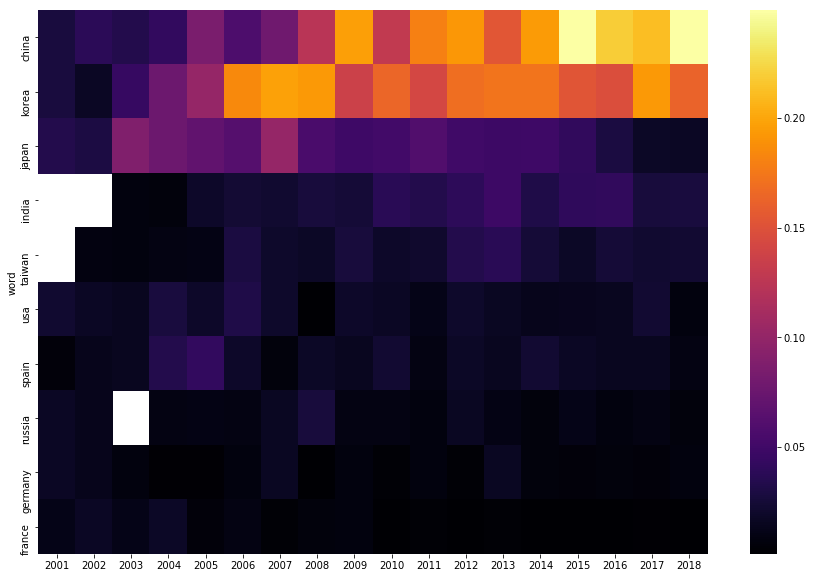

In [40]:
#opcional para o artigo
plt.figure(figsize=(15,10))
sns.heatmap(country, cmap="inferno")

In [41]:
genus = transposed_relative[['bacillus', 'streptomyces', 'paenibacillus', 'flavobacterium', 'pseudomonas', 'lactobacillus', 'sphingomonas', 'chryseobacterium', 'mycobacterium', 'pedobacter', 'vibrio', 'halomonas', 'clostridium', 'nocardia', 'microbacterium', 'burkholderia', 'micromonospora', 'streptococcus', 'deinococcus', 'lysobacter']].T

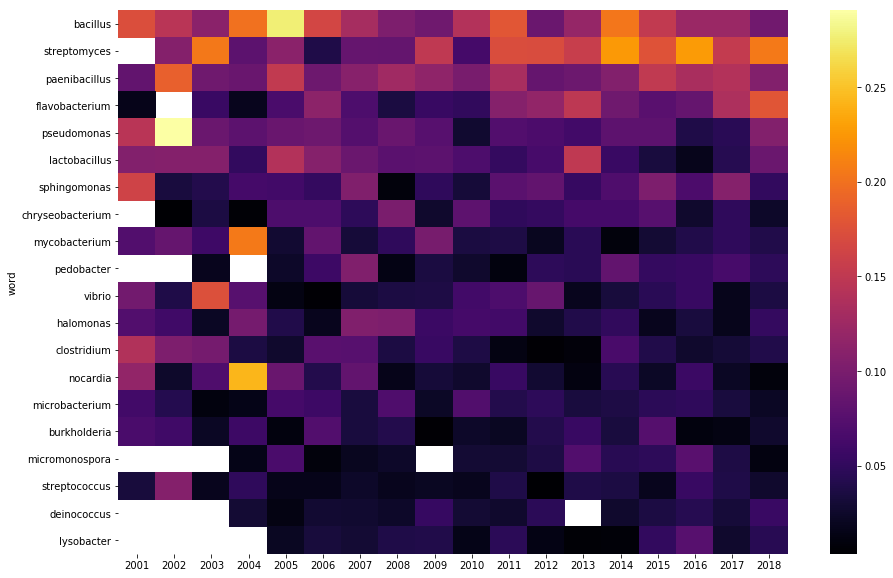

In [42]:
#opcional para o artigo
plt.figure(figsize=(15,10))
sns.heatmap(genus, cmap="inferno")

In [51]:
markers = transposed_relative[['gyrb', 'rpob', 'reca', 'atpd', 'rpoa', 'rpod', 'glnii', 'dnak', "recn"]].T

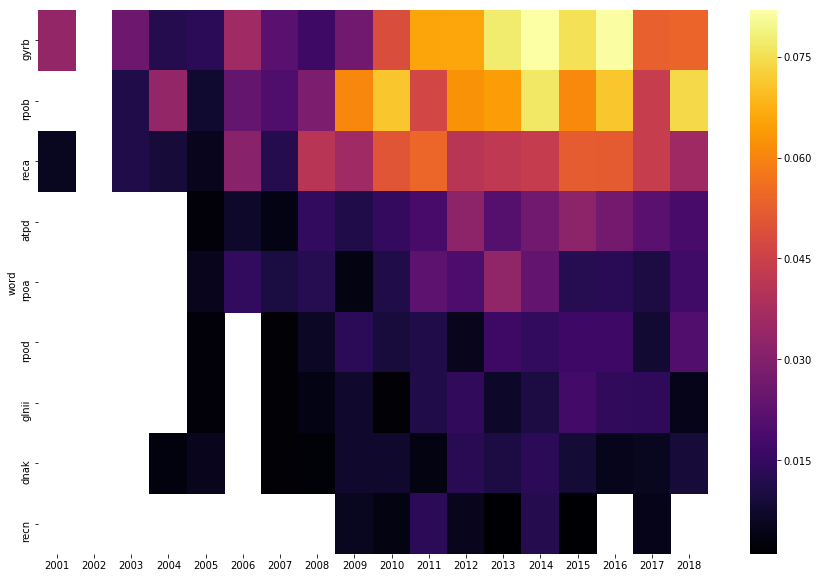

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(markers, cmap="inferno")

In [57]:
methods = transposed_relative[['rrna', 'phylogenetic', 'fatty', 'phenotypic', 'gc', 'dna-dna', 'lipids', 'chemotaxonomic', 'quinone', 'genomic', 'physiological', 'genotypic', 'biochemical', 'lipid', 'peptidoglycan', 'morphological', 'genome', 'ani', 'anib', 'ggdc', 'dddh', 'gani']].T

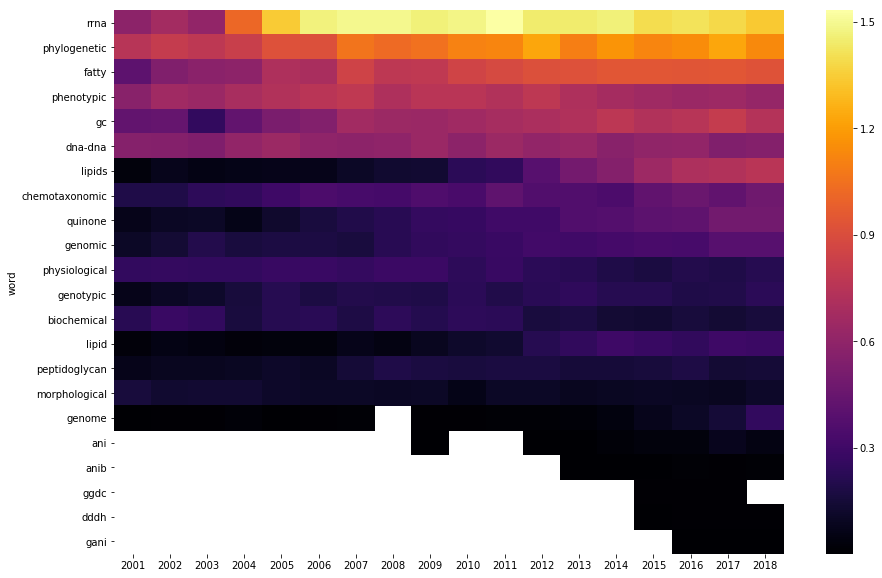

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(methods, cmap="inferno")

In [47]:
phenotype = transposed_relative[['aerobic', 'rod-shaped', 'gram-negative', 'non-motile', 'motile', 'anaerobic', 'gram-stain-negative', 'rods', 'non-spore-forming', 'gram-positive', 'halophilic', 'gram-stain-positive', 'catalase-positive', 'oxidase-positive', 'thermophilic', 'gram-staining-negative', 'endospore-forming', 'rod', 'mycelium', 'mesophilic', 'heterotrophic', 'spore-forming', 'coccoid', 'catalase-negative', 'gram-reaction-negative']].T

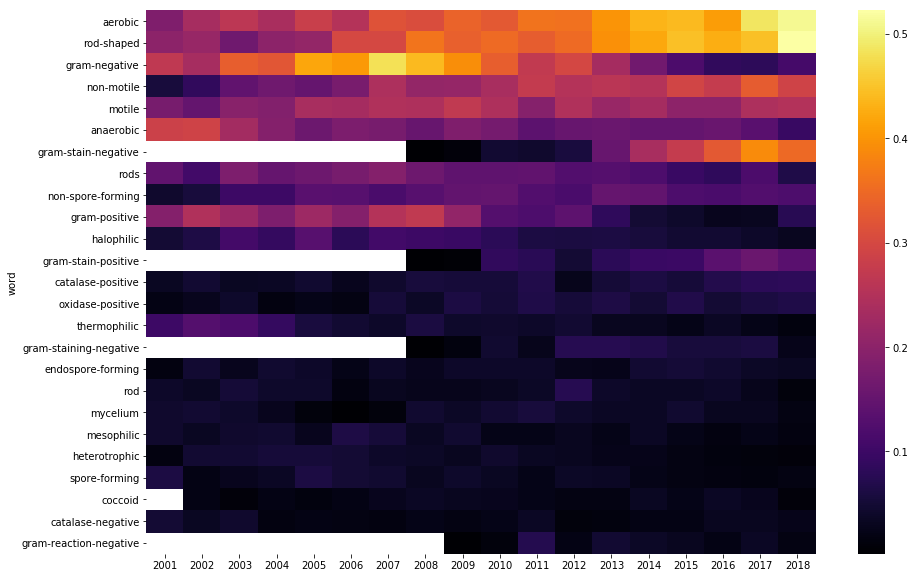

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(phenotype, cmap="inferno")

In [63]:
site = transposed_relative[['soil', 'water', 'lake', 'human', 'plant', 'root']].T

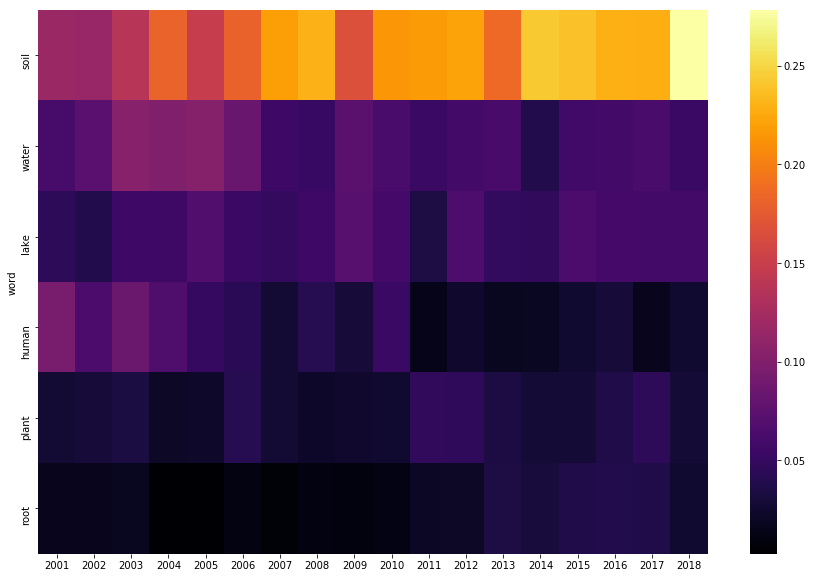

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(site, cmap="inferno")